   # Task 1: Import packages and Load Data

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Create path
path = r'/Users/vudung/Desktop/Tài liệu MCI/Python_MCI_anaconda/Bài 9/Tài liệu thực hành Pandas/'
data1 = pd.read_csv(path + 'sales2019_1.csv')
data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


# Task 2: Clean and Preprocess data


## Task 2.1: Merge 12 months data

In [10]:
frames = [] #Tao 1 list de truyen dataframe
for file in os.listdir(path):
    if file.endswith('csv'): #Kiem tra file csv 
        filepath = path + file
        df = pd.read_csv(filepath)
        frames.append(df) #truyen df vao list
        result = pd.concat(frames) #noi cac df
result

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
12006,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016"
12007,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215"
12008,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101"
12009,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016"


In [13]:
df = result
df.to_csv('AnnualSales2019.csv', index=False)

In [14]:
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4538,154827,AA Batteries (4-pack),1,3.84,02/14/19 14:27,"121 11th St, Dallas, TX 75001"
2334,297883,Apple Airpods Headphones,1,150,12/19/19 12:37,"678 11th St, Los Angeles, CA 90001"
1819,142966,Apple Airpods Headphones,1,150,01/06/19 12:57,"371 Ridge St, Dallas, TX 75001"
11141,161159,Bose SoundSport Headphones,1,99.99,02/21/19 01:43,"289 Chestnut St, Los Angeles, CA 90001"
3324,179743,USB-C Charging Cable,1,11.95,04/14/19 08:26,"415 Walnut St, Seattle, WA 98101"


## Task 2.2: Add 'month' column

In [21]:
df['Month'] = df['Order Date'].str[0:2]
print(set(df['Month']))

{nan, '10', '02', '04', '06', '11', 'Or', '03', '01', '05', '12', '08', '09', '07'}


Có 1 vài giá trị không xác định như `nan`, `or`, ta cần tìm cách làm sạch chúng

In [23]:
df = df.dropna(axis = 0, how = 'all') #xoa gia tri nan
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


Ta đã xoá được các hàng có giá trị nan, nhưng ta vẫn chưa hiểu vì sao lại xuất hiện giá trị or trong cột, nên ta sẽ truy suất vào cột để tìm hiểu

In [24]:
df[df['Month'] == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
433,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
864,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
930,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1979,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2032,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
9605,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
10217,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
10338,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
10705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


Vậy là các hàng này ở cột Order Date giá trị hiện là Order Date, khi ta cắt 2 kí tự đầu thì ra được giá trị Or, Nhìn vào các hàng khách giá trị hiển thị đều là tên của tiêu đề. Có thể là do khi ta gộp các dataframe ta đã gộp luôn cả tiêu đề. Vì vậy giờ ta sẽ xoá các hàng đó đi

In [26]:
# drop all rows that contain 'Coca Cola'
df = df.drop(df[df['Month'] == 'Or'].index)
print(set(df['Month']))

{'10', '02', '04', '11', '05', '03', '01', '06', '12', '08', '09', '07'}


Dữ liệu đã đẹp, chuyển sang task 3: report

#  Task 3: Reporting

## Task 3.1: What was the best month for sales? How much was earned that month?

In [43]:
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

int8
float32


In [42]:
#Chuyen du lieu ve so 
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast = 'integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast = 'float')

In [46]:
#Tạo 1 cột giá trị từng đơn hàng
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
3817,165642,Flatscreen TV,1,300.000000,03/19/19 08:03,"85 1st St, New York City, NY 10001",03,300.000000
3778,282412,34in Ultrawide Monitor,1,379.989990,11/21/19 12:15,"693 Madison St, Los Angeles, CA 90001",11,379.989990
8360,303635,Bose SoundSport Headphones,1,99.989998,12/08/19 23:15,"576 Meadow St, Los Angeles, CA 90001",12,99.989998
2368,178823,Lightning Charging Cable,1,14.950000,04/26/19 16:53,"612 Meadow St, Seattle, WA 98101",04,14.950000
14586,175942,Wired Headphones,1,11.990000,03/09/19 16:07,"740 Elm St, Seattle, WA 98101",03,11.990000


In [47]:
# Chuyển cột Sales sang cạnh cột Price Each
moving_col = df.pop('Sales')
df.insert(4,'Sales',moving_col)
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
9901,219355,Wired Headphones,1,11.990000,11.990000,06/24/19 14:56,"980 West St, Atlanta, GA 30301",06
470,150951,iPhone,1,700.000000,700.000000,02/04/19 10:24,"40 8th St, New York City, NY 10001",02
20559,315309,Bose SoundSport Headphones,1,99.989998,99.989998,12/11/19 21:08,"845 5th St, San Francisco, CA 94016",12
8536,256340,Bose SoundSport Headphones,1,99.989998,99.989998,09/06/19 09:15,"998 Church St, San Francisco, CA 94016",09
9608,159679,Lightning Charging Cable,1,14.950000,14.950000,02/25/19 01:53,"869 13th St, Boston, MA 02215",02


In [49]:
df.groupby('Month').sum()['Sales']

Month
01    1786511.25
02    2158127.50
03    2755969.50
04    3336376.50
05    3101881.00
06    2524465.00
07    2587445.00
08    2191698.25
09    2050361.25
10    3679254.25
11    3149785.00
12    4557905.50
Name: Sales, dtype: float32

In [90]:
max_sales_month = df.groupby(by='Month')['Sales'].sum().idxmax()
print("Tháng có doanh số bán hàng cao nhất là:", max_sales_month)
print("Với doanh thu",df.groupby(by='Month')['Sales'].sum().max())

Tháng có doanh số bán hàng cao nhất là: 12
Với doanh thu 4557905.5


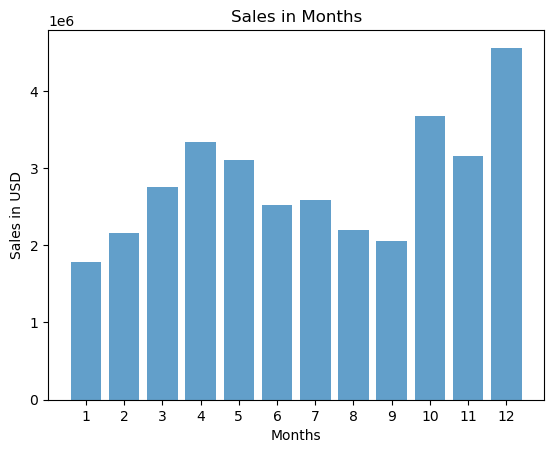

In [92]:
months = range(1,13)
sales_value = df.groupby(by='Month')['Sales'].sum()
plt.bar(x=months, height = sales_value,
       width = 0.8,
       align = 'center',
       alpha = 0.7)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.title('Sales in Months')
plt.show()

## Task 3.2 What city has the best sales?

In [85]:
## Add city
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])

In [86]:
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
22253,316921,Google Phone,1,600.000000,600.000000,12/12/19 13:04,"671 Lake St, Seattle, WA 98101",12,Seattle
2241,143359,AA Batteries (4-pack),1,3.840000,3.840000,01/22/19 21:12,"394 Johnson St, Austin, TX 73301",01,Austin
15609,191449,AA Batteries (4-pack),2,3.840000,7.680000,04/20/19 19:56,"861 Forest St, Portland, OR 97035",04,Portland
14311,273017,Bose SoundSport Headphones,1,99.989998,99.989998,10/07/19 09:51,"597 Spruce St, Atlanta, GA 30301",10,Atlanta
2904,262124,iPhone,1,700.000000,700.000000,10/25/19 15:25,"439 Cedar St, Los Angeles, CA 90001",10,Los Angeles


In [87]:
# Chuyển cột City sang cạnh cột Purchase Address
moving_col_city = df.pop('City')
df.insert(7,'City',moving_col_city)
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,Month
7157,148044,Wired Headphones,1,11.99,11.99,01/11/19 12:30,"27 Johnson St, Seattle, WA 98101",Seattle,01
11284,233707,Apple Airpods Headphones,1,150.00,150.00,07/18/19 19:06,"183 Hill St, Los Angeles, CA 90001",Los Angeles,07
5981,146928,Lightning Charging Cable,1,14.95,14.95,01/10/19 12:57,"732 12th St, Seattle, WA 98101",Seattle,01
7822,244157,USB-C Charging Cable,1,11.95,11.95,08/05/19 20:57,"698 Forest St, Boston, MA 02215",Boston,08
21833,316521,Wired Headphones,1,11.99,11.99,12/04/19 17:22,"13 13th St, Los Angeles, CA 90001",Los Angeles,12


In [88]:
df.groupby('City').sum()['Sales']

City
 Atlanta          2741642.00
 Austin           1786745.50
 Boston           3604080.75
 Dallas           2717793.75
 Los Angeles      5354040.00
 New York City    4581659.00
 Portland         2276649.25
 San Francisco    8124121.00
 Seattle          2693048.50
Name: Sales, dtype: float32

In [91]:
max_sales_city = df.groupby(by='City')['Sales'].sum().idxmax()
print("Tháng có doanh số bán hàng cao nhất là:", max_sales_city)
print("Với doanh thu",df.groupby(by='City')['Sales'].sum().max())

Tháng có doanh số bán hàng cao nhất là:  San Francisco
Với doanh thu 8124121.0


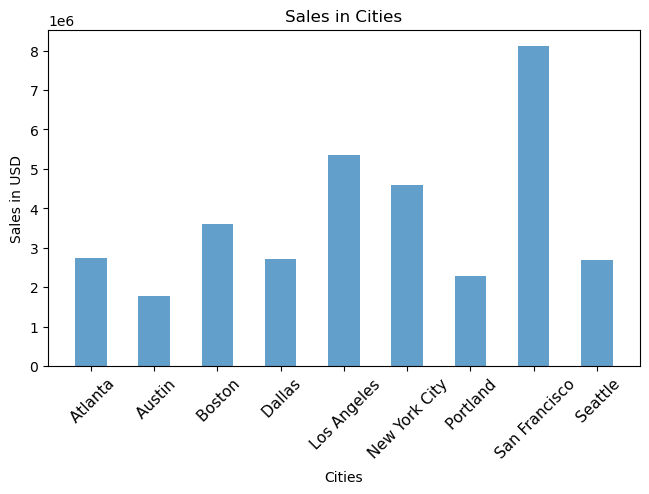

In [102]:
sales_value_city = df.groupby(by='City')['Sales'].sum()
plt.bar(x= sales_value_city.index, height = sales_value_city,
       width = 0.5,
       align = 'center',
       alpha = 0.7)
plt.xticks(rotation = 45,size = 11)
plt.tight_layout()
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.title('Sales in Cities')
plt.show()

# Task 3.3: What time should we display ads to maximize the likelihood of customer’s buying product?

In [103]:
#Chung ta lam viec nhieu voi thoi gian nen ta se doi kieu du lieu cua Order Date
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [108]:
df['Hour'] = df['Order Date'].dt.hour
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,Month,Hour
4839,263971,Google Phone,1,600.00,600.00,2019-10-28 23:03:00,"635 Madison St, Dallas, TX 75001",Dallas,10,23
5188,264301,Google Phone,1,600.00,600.00,2019-10-09 13:51:00,"962 Lakeview St, New York City, NY 10001",New York City,10,13
7389,229973,USB-C Charging Cable,1,11.95,11.95,2019-07-02 21:35:00,"385 Hickory St, New York City, NY 10001",New York City,07,21
6584,301944,AA Batteries (4-pack),1,3.84,3.84,2019-12-28 23:16:00,"274 Center St, Los Angeles, CA 90001",Los Angeles,12,23
13395,308446,USB-C Charging Cable,2,11.95,23.90,2019-12-28 12:58:00,"318 North St, San Francisco, CA 94016",San Francisco,12,12


In [119]:
max_sales_hour = df.groupby(by='Hour')['Sales'].count().idxmax()
print("Giờ có doanh số bán hàng cao nhất là:", max_sales_hour)
print("Với số đơn",df.groupby(by='Hour')['Sales'].count().max())

Giờ có doanh số bán hàng cao nhất là: 19
Với số đơn 12685


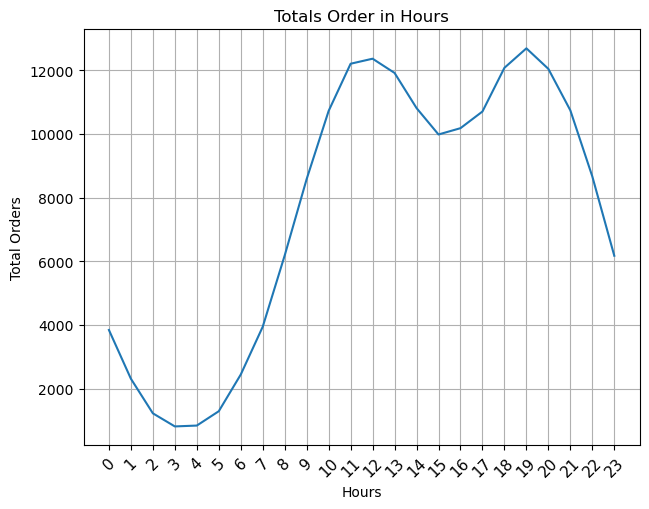

In [121]:
sales_value_hour = df.groupby(by='Hour')['Sales'].count()
plt.plot(sales_value_hour.index,sales_value_hour)
plt.xticks(sales_value_hour.index,rotation = 45,size = 11)
plt.tight_layout()
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Total Orders')
plt.title('Totals Order in Hours')
plt.show()

# Task 3.4: What products are most often sold together?

Ý tưởng: Ta sẽ tìm những đơn hàng có cùng Order Date và cùng Purchase Address, hoặc là những sản phẩm có cùng Order ID

In [124]:
df_dup = df[df["Order ID"].duplicated(keep =False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Hour,Purchase Address,City,Month
0,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,20,"942 Church St, Austin, TX 73301",Austin,03
1,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,20,"942 Church St, Austin, TX 73301",Austin,03
2,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,20,"942 Church St, Austin, TX 73301",Austin,03
30,162037,iPhone,1,700.00,700.00,2019-03-23 02:11:00,2,"277 Elm St, Los Angeles, CA 90001",Los Angeles,03
31,162037,Lightning Charging Cable,1,14.95,14.95,2019-03-23 02:11:00,2,"277 Elm St, Los Angeles, CA 90001",Los Angeles,03


In [130]:
#Join các product chung 1 order ID
groupProduct = lambda product: ', '.join(product)
df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Hour,Purchase Address,City,Month,All Product
0,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,20,"942 Church St, Austin, TX 73301",Austin,03,"iPhone, Lightning Charging Cable, Wired Headph..."
1,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,20,"942 Church St, Austin, TX 73301",Austin,03,"iPhone, Lightning Charging Cable, Wired Headph..."
2,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,20,"942 Church St, Austin, TX 73301",Austin,03,"iPhone, Lightning Charging Cable, Wired Headph..."
30,162037,iPhone,1,700.00,700.00,2019-03-23 02:11:00,2,"277 Elm St, Los Angeles, CA 90001",Los Angeles,03,"iPhone, Lightning Charging Cable"
31,162037,Lightning Charging Cable,1,14.95,14.95,2019-03-23 02:11:00,2,"277 Elm St, Los Angeles, CA 90001",Los Angeles,03,"iPhone, Lightning Charging Cable"


In [133]:
all_product = df_dup[['Order ID', 'All Product']].drop_duplicates()
all_product

,Order ID,All Product
0,162009,"iPhone, Lightning Charging Cable, Wired Headph..."
30,162037,"iPhone, Lightning Charging Cable"
60,162066,"AA Batteries (4-pack), USB-C Charging Cable"
66,162071,"Vareebadd Phone, USB-C Charging Cable"
78,162082,"Vareebadd Phone, Wired Headphones"
...,...,...
11908,248053,"AA Batteries (4-pack), 20in Monitor"
11924,248068,"Bose SoundSport Headphones, AA Batteries (4-pack)"
11945,248088,"ThinkPad Laptop, Bose SoundSport Headphones"
11963,248105,"Google Phone, Wired Headphones"


In [136]:
# Hảm đếm số lượng các giá trị duy nhất trong một Series
all_product['All Product'].value_counts().head(10)

All Product
iPhone, Lightning Charging Cable                        860
Google Phone, USB-C Charging Cable                      828
iPhone, Wired Headphones                                355
Vareebadd Phone, USB-C Charging Cable                   301
Google Phone, Wired Headphones                          295
iPhone, Apple Airpods Headphones                        274
Google Phone, Bose SoundSport Headphones                160
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     74
Vareebadd Phone, Bose SoundSport Headphones              56
Name: count, dtype: int64

# Task 3.5 What product sold the most? Why do you think it sold the most?

In [145]:
df.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   4058
27in 4K Gaming Monitor         6134
27in FHD Monitor               7429
34in Ultrawide Monitor         6076
AA Batteries (4-pack)         27148
AAA Batteries (4-pack)        30487
Apple Airpods Headphones      15383
Bose SoundSport Headphones    13236
Flatscreen TV                  4724
Google Phone                   5440
LG Dryer                        640
LG Washing Machine              649
Lightning Charging Cable      22841
Macbook Pro Laptop             4645
ThinkPad Laptop                4054
USB-C Charging Cable          23555
Vareebadd Phone                2023
Wired Headphones              20201
iPhone                         6732
Name: Quantity Ordered, dtype: int64

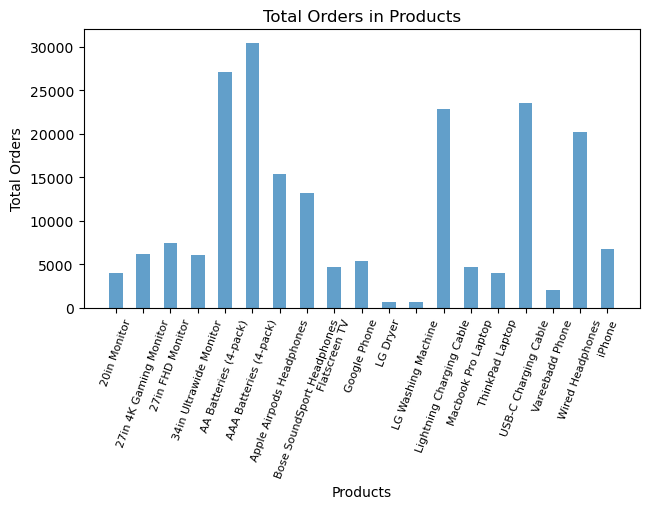

In [149]:
sales_value_product = df.groupby(by='Product')['Quantity Ordered'].sum()
plt.bar(x= sales_value_product.index, height = sales_value_product,
       width = 0.5,
       align = 'center',
       alpha = 0.7)
plt.xticks(rotation = 70,size = 8)
plt.tight_layout()
plt.xlabel('Products')
plt.ylabel('Total Orders')
plt.title('Total Orders in Products')
plt.show()

In [157]:
prices = df.groupby('Product')['Price Each'].mean()
prices

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.989990
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.989960
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32

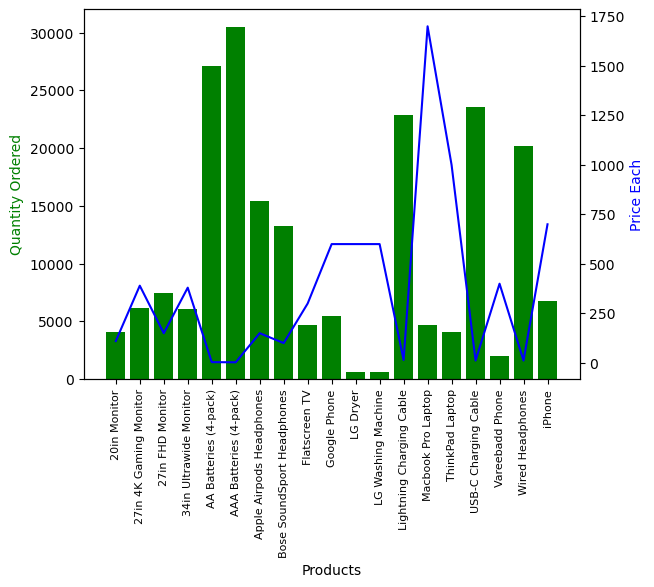

In [164]:
# Plot the chart: Xem sự tương quan giữa Giá của từng sản phẩm so với tổng order
x = prices.index
y1 = sales_value_product
y2 = prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(x, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')

plt.show()

Như vậy, với những dữ liệu mà ta có, ta có thể thấy sản phẩm giá thấp thì sẽ bán được với số lượng lớn, sản phẩm giá cao sẽ bán được ít hơn. Đương nhiên việc bán được số lượng nhiều hay ít còn phụ thuộc vào cả nhiều yếu tố khác nữa, nhưng ta có thể nhận xét giá cả cũng đã phụ thuộc đến số lượng bán được 